In [1]:
# Step 1: Load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = 'nfl.csv'
df = pd.read_csv(file_path)

# Step 3: Initial data examination
print("Initial Data Overview:")
print(df.head())
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

C:\Users\PC\AppData\Local\Temp\ipykernel_7328\3155413272.py:9: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Initial Data Overview:
         Date      GameID  Drive  qtr  down   time  TimeUnder  TimeSecs  \
0  2009-09-10  2009091000      1    1   NaN  15:00         15    3600.0   
1  2009-09-10  2009091000      1    1   1.0  14:53         15    3593.0   
2  2009-09-10  2009091000      1    1   2.0  14:16         15    3556.0   
3  2009-09-10  2009091000      1    1   3.0  13:35         14    3515.0   
4  2009-09-10  2009091000      1    1   4.0  13:27         14    3507.0   

   PlayTimeDiff SideofField  ...    yacEPA  Home_WP_pre  Away_WP_pre  \
0           0.0         TEN  ...       NaN     0.485675     0.514325   
1           7.0         PIT  ...  1.146076     0.546433     0.453567   
2          37.0         PIT  ...       NaN     0.551088     0.448912   
3          41.0         PIT  ... -5.031425     0.510793     0.489207   
4           8.0         PIT  ...       NaN     0.461217     0.538783   

   Home_WP_post  Away_WP_post  Win_Prob       WPA    airWPA    yacWPA  Season  
0      0.5464

In [2]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

print("\nMissing Values after Imputation:")
print(df.isnull().sum())


Missing Values after Imputation:
Date        0
GameID      0
Drive       0
qtr         0
down        0
           ..
Win_Prob    0
WPA         0
airWPA      0
yacWPA      0
Season      0
Length: 102, dtype: int64


In [3]:
# Step 5: Detect and handle outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in df.select_dtypes(include=[np.number]).columns:
    df = remove_outliers(df, column)

print("\nData Shape after Removing Outliers:", df.shape)


Data Shape after Removing Outliers: (65108, 102)


In [6]:
# Step 6: Correct inconsistencies
# Example: Standardizing text data (like team names) to a consistent format
if 'posteam' in df.columns:
    df['posteam'] = df['posteam'].str.upper()

# Step 7: Standardize data formats (e.g., dates)
# Example: Convert date columns to datetime format if applicable
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 8: Remove duplicates
df.drop_duplicates(inplace=True)
print("\nData Shape after Removing Duplicates:", df.shape)


Data Shape after Removing Duplicates: (65108, 102)


C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


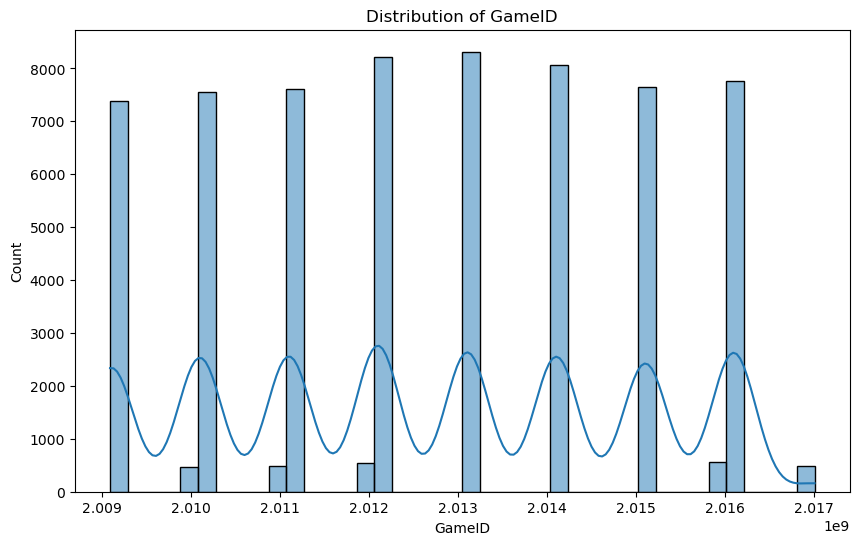

In [7]:
# Step 9: Data exploration using statistical methods and visualization
# Example: Visualizing the distribution of a numerical column
numerical_cols = df.select_dtypes(include=[np.number]).columns
if not numerical_cols.empty:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[numerical_cols[0]], kde=True)
    plt.title(f'Distribution of {numerical_cols[0]}')
    plt.show()

In [ ]:
# Example: Visualizing relationships between variables
sns.pairplot(df)
plt.show()